**Name: Muhan Li**

**USC ID: 5104027574**

# Banknote Authentication_EE559 Homework 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import arange
from sklearn.neighbors import KNeighborsClassifier

## (a) Download the dataset

## (b) Pre-Processing
### i. Make scatterplots of the independent variables

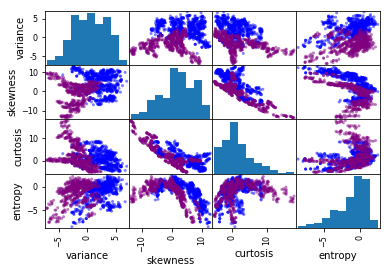

In [2]:
data = pd.read_csv('data_banknote_authentication.txt', 
                   names = ['variance','skewness','curtosis','entropy','label'])
data['color'] = data.label.apply(lambda x: 'blue' if x == 0 else 'purple')

from pandas.plotting import scatter_matrix
scatter_matrix(data[['variance', 'skewness', 'curtosis', 'entropy']],
               c = data['color'])
plt.show()

**FIGURE 1.** A scatterplot matrix of the banknote authentication dataset.
Those blue points represent the data with label '0' and purple points represent the data with label '1'.

### ii. Make boxplots for each of the independent variables

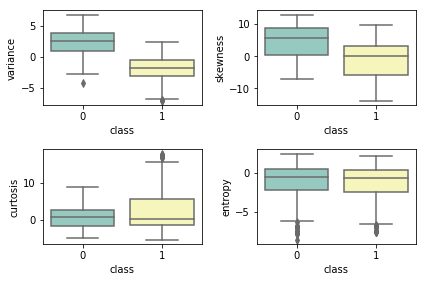

In [3]:
df = pd.read_csv('data_banknote_authentication.txt', 
                 names = ['variance','skewness','curtosis','entropy','class'])
plt.figure()

# variance
ax1 = plt.subplot(221)
ax1 = sns.boxplot(x=df['class'], y=df['variance'], palette="Set3")

# skewness
ax2 = plt.subplot(222)
ax2 = sns.boxplot(x=df['class'], y=df['skewness'], palette="Set3")

# curtosis
ax3 = plt.subplot(223)
ax3 = sns.boxplot(x=df['class'], y=df['curtosis'], palette="Set3")

# entropy
ax4 = plt.subplot(224)
ax4 = sns.boxplot(x=df['class'], y=df['entropy'], palette="Set3")

plt.tight_layout(1)
plt.show()

**FIGURE 2.** Boxplots of each independent variable for class 1 (green) and class 0 (yellow).

### iii. Generate the test and training set

In [4]:
data = pd.read_csv('data_banknote_authentication.txt', 
                   names = ['variance','skewness','curtosis','entropy','class'])
df = data[data['class'] == 0]
test0 = df.head(200)
train0 = df[df.index >= 200]
df = data[data['class'] == 1]
test1 = df.head(200)
rows = df.iloc[:,0].size
train1 = df.tail(rows-200)
from numpy import *
test = np.vstack((test0, test1))
train = np.vstack((train0, train1))
print('The test set:\n', test)
print('\nThe training set:\n', train)

The test set:
 [[ 3.6216   8.6661  -2.8073  -0.44699  0.     ]
 [ 4.5459   8.1674  -2.4586  -1.4621   0.     ]
 [ 3.866   -2.6383   1.9242   0.10645  0.     ]
 ...
 [-6.3979   6.4479   1.0836  -6.6176   1.     ]
 [-2.2501   3.3129  -0.88369 -2.8974   1.     ]
 [-1.1859  -1.2519   2.2635   0.77239  1.     ]]

The training set:
 [[ -2.0897   10.8265    2.3603   -3.4198    0.     ]
 [  4.0026   -3.5943    3.5573    0.26809   0.     ]
 [ -0.78689   9.5663   -3.7867   -7.5034    0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


## (c) Classification using KNN
### i. k-nearest neighbors with Euclidean metric (use sklearn package)

In [5]:
knn = KNeighborsClassifier()
X = train[:, [0,1,2,3]]
y = train[:, 4]
knn.fit(X, y)
test_set = test[:, [0,1,2,3]]
predict = knn.predict(test_set)

**Note:** The code above can predict the class (or label) of test set we input.

### ii. Test all the data in the test database
#### 1) Plot errors in terms of 1/k

In [6]:
X_train = train[:, [0,1,2,3]]
y_train = train[:, 4]
X_test = test[:, [0,1,2,3]]
y_test = test[:, 4]

In [7]:
error_train = []
for i in arange(1, 902, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error_train.append(np.mean(pred_i != y_train))

In [8]:
error_test = []
for i in arange(1, 902, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test.append(np.mean(pred_i != y_test))

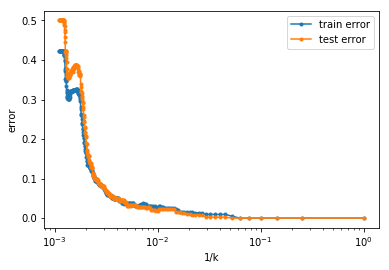

In [9]:
k = arange(1, 902, 3)
x = 1/k
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(x, error_train, marker='.')
ax.semilogx(x, error_test, marker='.')
plt.xlabel('1/k')
plt.ylabel('error')
plt.legend(['train error','test error'])
plt.show()

**FIGURE 3.** The graph shows the relationship between two kinds of errors and 1/k (in form of exponential).

The **most suitable k** that I choose: **k* = 1** *(all values of k ∈ {1,4,7,...,19} have zero test error, so any value among them can be the optimal one I think)*

#### 2) Calculate the confusion matrix, true positive rate (TPR), true negative rate (TNR), precision, and F-score when k = k*

In [10]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)

Confusion matrix:
 [[200   0]
 [  0 200]]


In [12]:
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
precision = TP/(TP+FP)
f_score = 2 * ((precision * TPR) / (precision + TPR))
print('TPR:      \t', TPR)
print('TNR:      \t', TNR)
print('precision:\t', precision)
print('F-score:  \t', f_score)

TPR:      	 1.0
TNR:      	 1.0
precision:	 1.0
F-score:  	 1.0


### iii. Plot the best error rate against the size of training set N

In [13]:
best_error = []
for N in arange(50, 801, 50):
    n = N//2
    df = data[data['class'] == 0]
    test0 = df.head(200)
    train0 = df[200:(200+n)]
    df = data[data['class'] == 1]
    test1 = df.head(200)
    train1 = df[200:(200+n)]
    from numpy import *
    test = np.vstack((test0, test1))
    train = np.vstack((train0, train1))

    X_test = test[:, [0,1,2,3]]
    y_test = test[:, 4]
    X_train = train[:, [0,1,2,3]]
    y_train = train[:, 4]

    error_test = []
    for i in arange(1, N-1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_test.append(np.mean(pred_i != y_test))
    best_error.append(min(error_test))

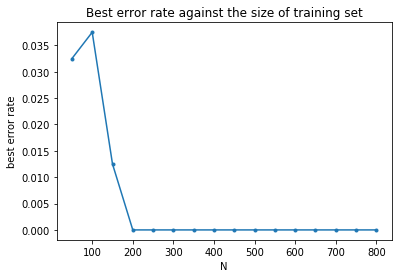

In [14]:
N = arange(50, 801, 50)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N, best_error, marker='.')
plt.xlabel('N')
plt.ylabel('best error rate')
plt.title('Best error rate against the size of training set')
plt.show()

**FIGURE 4.** Best test error rate of N ∈ {50,100,150,...,900}.

<font size=5>***Further explore some variants of KNN***</font>
## (d) Summarize the test errors using different metrics

<font size=4>**The test and training set:**</font>

In [15]:
df = data[data['class'] == 0]
test0 = df.head(200)
train0 = df[df.index >= 200]
df = data[data['class'] == 1]
test1 = df.head(200)
rows = df.iloc[:,0].size
train1 = df.tail(rows-200)
from numpy import *
test = np.vstack((test0, test1))
train = np.vstack((train0, train1))

X_train = train[:, [0,1,2,3]]
y_train = train[:, 4]
X_test = test[:, [0,1,2,3]]
y_test = test[:, 4]

### i. Minkowski Distance
#### A. Manhattan ( p = 1 )

In [16]:
error_test_1a = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test_1a.append(np.mean(pred_i != y_test))

#### B. with log(p) ∈ {0.1, 0.2, 0.3, ..., 1}

In [17]:
error_test_1b = []
for i in 10**(arange(0.1, 1.1, 0.1)):
    knn = KNeighborsClassifier(n_neighbors=1, p=i, 
                               metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test_1b.append(np.mean(pred_i != y_test))
errors = pd.DataFrame({'log': arange(0.1, 1.1, 0.1),
                       'error': error_test_1b})
print(errors)

   log  error
0  0.1    0.0
1  0.2    0.0
2  0.3    0.0
3  0.4    0.0
4  0.5    0.0
5  0.6    0.0
6  0.7    0.0
7  0.8    0.0
8  0.9    0.0
9  1.0    0.0


**TABLE 1.** Different error of each log(p)

The **best log(p)**: **0.1**. *All values of p generate zero error, so any of them can be the optimal one.*

#### C. Chebyshev ( p = infinity )

In [18]:
error_test_1c = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               p=float('inf'), 
                               metric='chebyshev')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test_1c.append(np.mean(pred_i != y_test))

### ii. Mahalanobis

In [19]:
error_test_2 = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(X_train)})
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test_2.append(np.mean(pred_i != y_test))

In [20]:
print('\nMetric\t  best error')
print('Minkowski  \t', min(error_test_1a))
print('Chebyshev  \t', min(error_test_1c))
print('Mahalanobis\t', min(error_test_2))


Metric	  best error
Minkowski  	 0.0
Chebyshev  	 0.0
Mahalanobis	 0.0


**TABLE 2.** The test errors with different metrics.

## (e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors.

<font size=4>**Euclidean**</font>

In [21]:
error_test1 = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               weights='distance', 
                               p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test1.append(np.mean(pred_i != y_test))
best_error1=min(error_test1)

<font size=4>**Manhattan**</font>

In [22]:
error_test2 = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               weights='distance', 
                               metric='manhattan')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test2.append(np.mean(pred_i != y_test))
best_error2=min(error_test2)

<font size=4>**Chebyshev**</font>

In [23]:
error_test3 = []
for i in arange(1, 902, 10):
    knn = KNeighborsClassifier(n_neighbors=i, 
                               weights='distance', 
                               metric='chebyshev')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_test3.append(np.mean(pred_i != y_test))
best_error3=min(error_test3)

<font size=4>**Report the best test errors**</font>

In [24]:
print('\nMetric\tbest error')
print('Euclidean\t', best_error1)
print('Manhattan\t', best_error2)
print('Chebyshev\t', best_error3)


Metric	best error
Euclidean	 0.0
Manhattan	 0.0
Chebyshev	 0.0


## (f) Lowest training error rate

The lowest training error rate I achieved is 0.